18 + 곱함 변수를 상관계수 순으로 하나씩 추가

### 사용 라이브러리 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# import csv
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings 
warnings.filterwarnings('ignore')

### Data set 확인

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# train 

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# test 

test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [9]:
test.shape

(418, 11)

In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
# train 결측값
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# test 결측값
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 데이터 전처리

#### 1. 결측값 처리

- Age -> 평균 29.69

In [14]:
train['Age'] = train['Age'].fillna(29.69)     # train
test['Age'] = test['Age'].fillna(29.69)   # test

- Embarked -> 최빈값 S(0)

In [15]:
train['Embarked'] = train['Embarked'].fillna('S')

- Fare -> 평균 + log

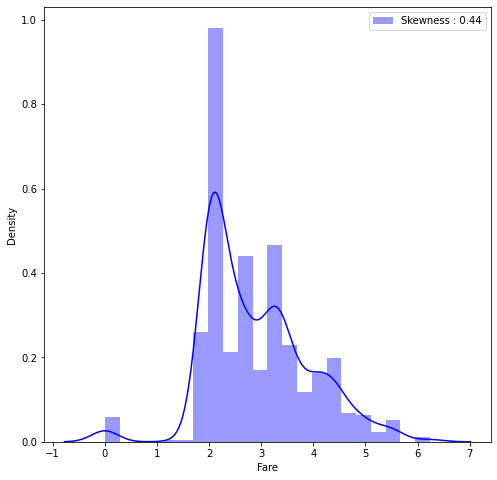

In [16]:
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())

# 모델의 성능을 높일 수 있다. 

train['Fare'] = train['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
test['Fare'] = test['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(train['Fare'],color='b',label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#### 2. 변수 생성

In [17]:
# age_gr / married / f_nm / f_ox / fare_gr

- Age > Age_gr

In [18]:
def age_gr(x):
    if x < 5 :
       return 'very young'
    if 5<=x<10:
       return 'young'
    if 10<=x<16:
       return 'children'
    if 16<=x<20:
       return 's_adult'    # 16세~ 성인 간주 
    if 20<=x<30:
       return '20s'
    if 30<=x<40:
       return '30s'
    if 40<=x<50:
       return '40s'
    if 50<=x<60:
       return '50s'
    if 60<=x<70:
       return '60s'
    if 70<=x<80:
       return '70s'
    if 80<=x<90:
       return '80s'


In [19]:
train['Age_gr'] = train['Age'].apply(lambda x:age_gr(x))
test['Age_gr'] = test['Age'].apply(lambda x:age_gr(x))

- SibSp + Parch > F_nm

In [20]:
train['F_nm'] = train['SibSp'] + train['Parch']
test['F_nm'] = test['SibSp'] + test['Parch']

- F_nm > F_ox

In [21]:
def f_ox(x):
    if x == 0:
        return 0
    if x >= 1:
        return 1   

In [22]:
train['F_ox'] = train['F_nm'].apply(lambda x: f_ox(x))
test['F_ox'] = test['F_nm'].apply(lambda x: f_ox(x))

- **Fare > Fare_gr**

In [23]:
train['Fare'] = pd.qcut(train['Fare'], 5)
test['Fare'] = pd.qcut(test['Fare'], 5)

train['Fare'].value_counts()

(2.061, 2.351]     184
(3.076, 3.681]     180
(-0.001, 2.061]    179
(3.681, 6.239]     176
(2.351, 3.076]     172
Name: Fare, dtype: int64

In [24]:
train['Fare'] = train['Fare'].astype('category').cat.codes
test['Fare'] = test['Fare'].astype('category').cat.codes

train['Fare'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare, dtype: int64

- Name > Married

In [25]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,20s,1,1


In [26]:
# 미혼(0)
# Miss      
# Master  
# Rev   
# Mlle  


# 기혼(1)
# Mr        
# Mrs       


# X 불명(9)
# Don           
# Mme           
# Col          
# Capt          
# the Countess  
# Jonkgeer      
# Dr            
# Ms            
# Major         
# Lady          
# Sir  


In [27]:
train['Name'] = train['Name'].str.split(',').str[1]
train['Name'] = train['Name'].str.split('.').str[0]

In [28]:
test['Name'] = test['Name'].str.split(',').str[1]
test['Name'] = test['Name'].str.split('.').str[0]

In [29]:
my = [' Mr', ' Mrs']
mn = [' Miss', ' Master', ' Rev', ' Mlle']

train['Married'] = train['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  
test['Married'] = test['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)      

#### 문자열 -> 숫자형으로 인코딩

In [30]:
# sex, embarked / age_gr 레이블 인코딩 
 
train['Sex'] = LabelEncoder().fit_transform(train.Sex)  # 0 여성 / 1 남성 
test['Sex'] = LabelEncoder().fit_transform(test.Sex)

train['Embarked'] = LabelEncoder().fit_transform(train.Embarked)
test['Embarked'] = LabelEncoder().fit_transform(test.Embarked)

train['Age_gr'] = LabelEncoder().fit_transform(train.Age_gr)
test['Age_gr'] = LabelEncoder().fit_transform(test.Age_gr)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox,Married
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,0,NaN,2,0,1,1,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,4,C85,0,1,1,1,0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,1,NaN,2,0,0,0,1
3,4,1,1,Mrs,0,35.0,1,0,113803,4,C123,2,1,1,1,0
4,5,0,3,Mr,1,35.0,0,0,373450,1,NaN,2,1,0,0,0


#### 필요없는 변수 drop

In [31]:
# cabin, ticket, Name, Age, SibSp, Parch

train = train.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Name','Age'], axis=1)
test = test.drop(['Cabin', 'SibSp', 'Parch','Ticket','Name', 'Age'], axis=1)

In [32]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,0,3,1,0,2,0,1,1,0
1,1,1,0,4,0,1,1,1,0
2,1,3,0,1,2,0,0,0,1
3,1,1,0,4,2,1,1,1,0
4,0,3,1,1,2,1,0,0,0


In [33]:
test.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,892,3,1,1,1,1,0,0,0
1,893,3,0,0,2,2,1,1,0
2,894,2,1,1,1,4,0,0,0
3,895,3,1,1,2,0,0,0,0
4,896,3,0,2,2,0,2,1,0


### 변수 간 상관관계

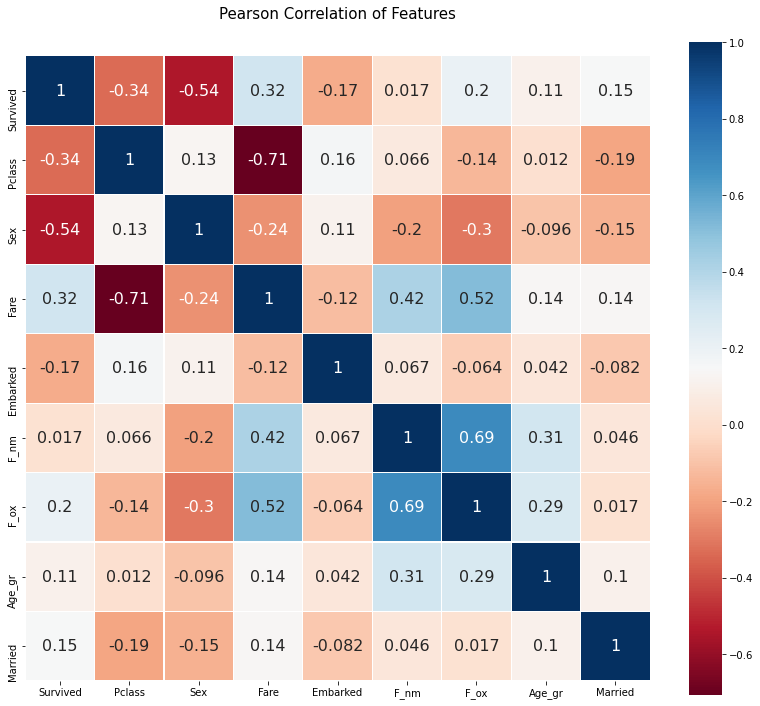

In [34]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'F_nm', 'F_ox', 'Age_gr', 'Married']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [35]:
# 상관계수 높은 애들만 원핫 

train = pd.concat([train,pd.get_dummies(train['Pclass'], prefix='Pclass')], axis=1)
test= pd.concat([test,pd.get_dummies(test['Pclass'], prefix='Pclass')], axis=1)

train = pd.concat([train,pd.get_dummies(train['Sex'], prefix='Sex')], axis=1)
test= pd.concat([test,pd.get_dummies(test['Sex'], prefix='Sex')], axis=1)

train = pd.concat([train,pd.get_dummies(train['Fare'], prefix='Fare')], axis=1)
test= pd.concat([test,pd.get_dummies(test['Fare'], prefix='Fare')], axis=1)

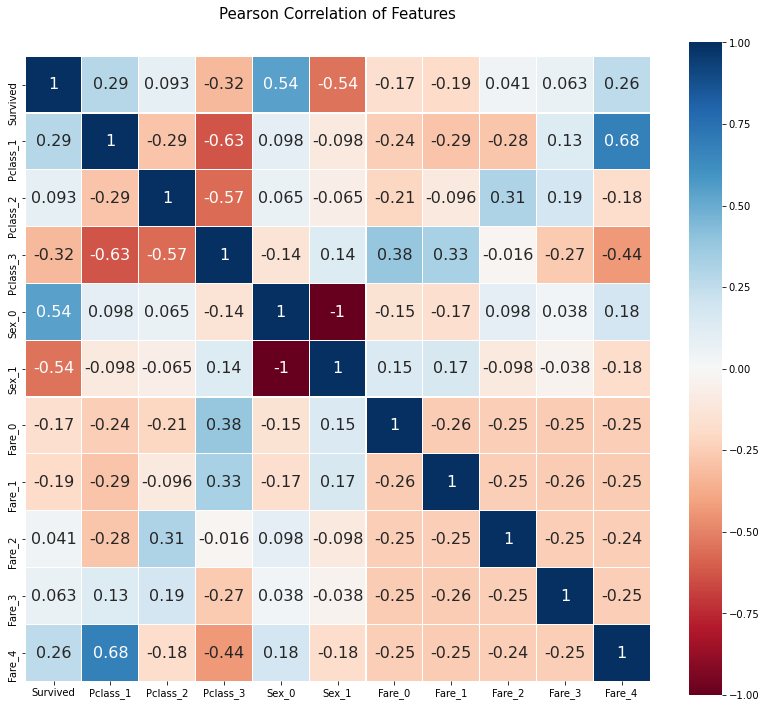

In [36]:
import seaborn as sns
heatmap_data = train[['Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1',
       'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [37]:
# 상관계수 높은 변수로 곱변수 생성(18) + corr 0.2인 f_ox 추가 

def pclass(x):
    if x == 3:
        return 1
    if x == 2:
        return 2
    if x ==1 :
        return 3

def sex(x):
    if x ==1:
        return 1
    if x ==0:
        return 2

def fare(x):
    if x == 1:
        return 1
    if x == 0:
        return 2
    if x ==2 :
        return 3
    if x ==3:
        return 4
    if x ==4:
        return 5

# f_ox 추가
def f_ox(x):
    if x ==0:
        return 1
    if x ==1:
        return 2



In [38]:
train['Pclass'] = train['Pclass'].apply(lambda x: pclass(x))
test['Pclass'] = test['Pclass'].apply(lambda x: pclass(x))

train['Sex'] = train['Sex'].apply(lambda x: sex(x))
test['Sex'] = test['Sex'].apply(lambda x: sex(x))

train['Fare'] = train['Fare'].apply(lambda x: fare(x))
test['Fare'] = test['Fare'].apply(lambda x: fare(x))

# f_ox 추가
train['F_ox'] = train['F_ox'].apply(lambda x: f_ox(x))
test['F_ox'] = test['F_ox'].apply(lambda x: f_ox(x))

In [39]:
train['pclass_sex'] =train['Pclass']*train['Sex']
test['pclass_sex'] =test['Pclass']*test['Sex']

train['pclass_fare'] =train['Pclass']*train['Fare']
test['pclass_fare'] =test['Pclass']*test['Fare']

train['pclass_f_ox'] =train['Pclass']*train['F_ox']
test['pclass_f_ox'] =test['Pclass']*test['F_ox']

train['sex_fare'] =train['Sex']*train['Fare']
test['sex_fare'] =test['Sex']*test['Fare']

train['sex_f_ox'] =train['Sex']*train['F_ox']
test['sex_f_ox'] =test['Sex']*test['F_ox']


train['pclass_sex_fare'] = train['Pclass']*train['Sex']*train['Fare']
test['pclass_sex_fare'] = test['Pclass']*test['Sex']*test['Fare']

train['sex_fare_f_ox'] = train['Sex']*train['Fare']*train['F_ox']
test['sex_fare_f_ox'] = test['Sex']*test['Fare']*test['F_ox']

train['all'] = train['Pclass']*train['Sex']*train['Fare']*train['F_ox']
test['all'] = test['Pclass']*test['Sex']*test['Fare']*test['F_ox']

In [40]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Age_gr', 'F_nm',
       'F_ox', 'Married', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1',
       'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4', 'pclass_sex',
       'pclass_fare', 'pclass_f_ox', 'sex_fare', 'sex_f_ox', 'pclass_sex_fare',
       'sex_fare_f_ox', 'all'],
      dtype='object')

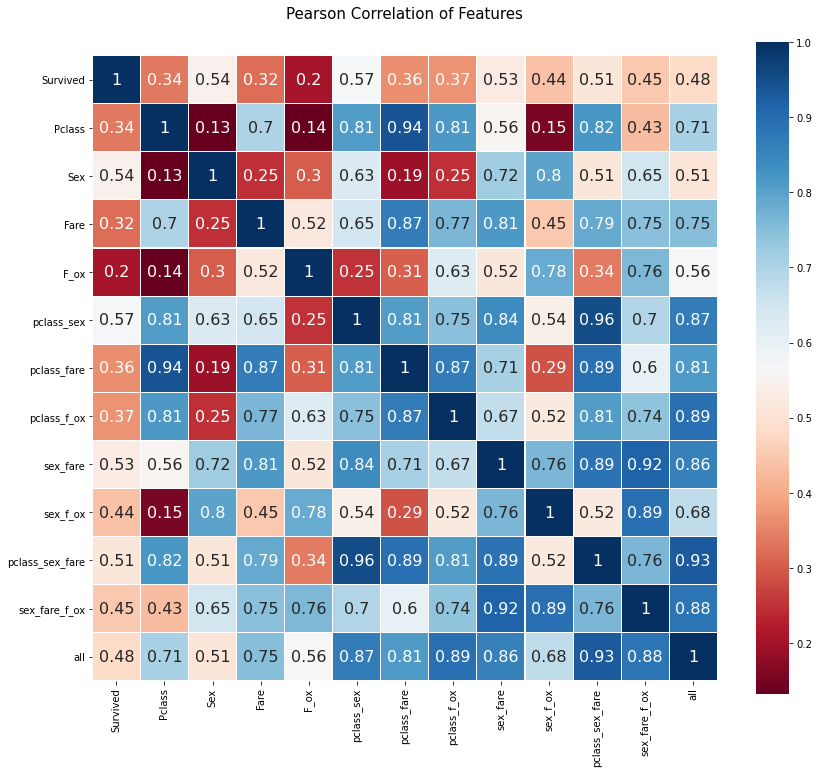

In [41]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare',
       'F_ox', 'pclass_sex', 'pclass_fare', 'pclass_f_ox',
       'sex_fare', 'sex_f_ox', 'pclass_sex_fare', 'sex_fare_f_ox', 'all']] 


colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [42]:
train = train.drop(['Pclass', 'Sex', 'Fare','Embarked', 'F_nm', 'Age_gr', 'Married'], axis=1)
test = test.drop(['Pclass', 'Sex', 'Fare','Embarked', 'F_nm', 'Age_gr', 'Married'], axis=1)

#### 변수 간 관계

In [43]:
# sns.pairplot(train,diag_kind='hist')
# plt.show()

In [44]:
# import warnings 
# warnings.filterwarnings('ignore')

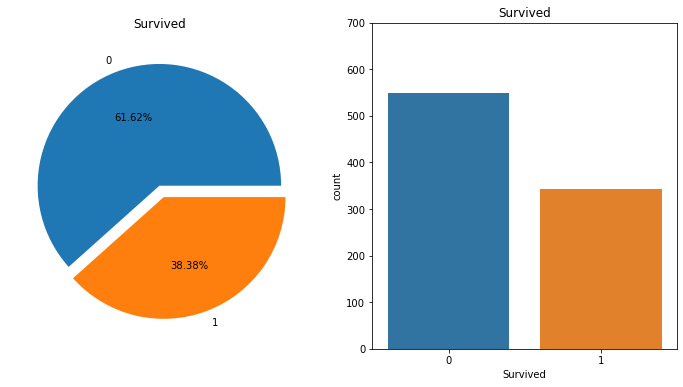

In [45]:
f,ax=plt.subplots(1,2,figsize=(12,6))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.ylim(0,700)
plt.show()

In [46]:
# # 변수별 평균 생존률

# fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
# fig.set_size_inches(20,10)

# sns.barplot(x='Pclass', y='Survived',data= train, ax=ax1)
# sns.barplot(x='Sex', y='Survived',data= train, ax=ax2)
# sns.barplot(x='Embarked', y='Survived',data= train, ax=ax3)
# sns.barplot(x='Age_gr', y='Survived',data= train, ax=ax4)
# sns.barplot(x='F_nm', y='Survived',data= train, ax=ax5)
# sns.barplot(x='F_ox', y='Survived',data= train, ax=ax6)
# sns.barplot(x='Married', y='Survived',data= train, ax=ax7)
# sns.barplot(x='Fare', y='Survived', data= train, ax=ax8)

# ax1.set(xlabel='')
# ax2.set(xlabel='')
# ax3.set(xlabel='')
# ax4.set(xlabel='')
# ax5.set(xlabel='')
# ax6.set(xlabel='')
# ax7.set(xlabel='')
# ax8.set(xlabel='')

# ax1.set(title="Pclass")
# ax2.set(title="Sex")
# ax3.set(title="Embarked")
# ax4.set(title="Age_gr")
# ax5.set(title="F_nm")
# ax6.set(title="F_ox")
# ax7.set(title="Married")
# ax8.set(title='Fare')



### 다양한 분류 모델

In [47]:
train['Survived'].unique()

array([0, 1], dtype=int64)

In [48]:
train.head()

,Survived,F_ox,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,pclass_sex,pclass_fare,pclass_f_ox,sex_fare,sex_f_ox,pclass_sex_fare,sex_fare_f_ox,all
0,0,2,0,0,1,0,1,1,0,0,0,0,1,2,2,2,2,2,4,4
1,1,2,1,0,0,1,0,0,0,0,0,1,6,15,6,10,4,30,20,60
2,1,1,0,0,1,1,0,0,1,0,0,0,2,1,1,2,2,2,2,2
3,1,2,1,0,0,1,0,0,0,0,0,1,6,15,6,10,4,30,20,60
4,0,1,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1


In [49]:
test.head()

,PassengerId,F_ox,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,pclass_sex,pclass_fare,pclass_f_ox,sex_fare,sex_f_ox,pclass_sex_fare,sex_fare_f_ox,all
0,892,1,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1
1,893,2,0,0,1,1,0,1,0,0,0,0,2,2,2,4,4,4,8,8
2,894,1,0,1,0,0,1,0,1,0,0,0,2,2,2,1,1,2,1,2
3,895,1,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1
4,896,2,0,0,1,1,0,0,0,1,0,0,2,3,2,6,4,6,12,12


train, test split

In [50]:
X = train.iloc[:,1:].values
y = train['Survived']
X.shape, y.shape

((891, 19), (891,))

In [51]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 19), (891,), (418, 19))

In [52]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.47

In [53]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Sex_0,0.602570
14,sex_fare,0.595417
0,F_ox,0.525151
13,pclass_f_ox,0.523749
9,Fare_3,0.431666
11,pclass_sex,0.244626
8,Fare_2,0.239242
10,Fare_4,0.152741
18,all,0.115960
16,pclass_sex_fare,0.066667


In [54]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.0

In [55]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

75.65

In [56]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

74.3

In [57]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

# 76315

81.37

In [63]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

# 77033

81.37

In [59]:
# XGBoost

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
xgb.score(X_train, Y_train)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_xgb

# 77751

[12:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


81.37

In [64]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('20r.csv', index=False)

In [65]:
# 18.3r 상관관계 높은 변수만 곱해서 새 변수 만들기 
# xgb 81.37 / 78468
# rfc 81.37 / 78468 > fix 후 파라미터

# 20. 상관계수 순대로 곱 변수 생성 
# 1) corr 0.2 f_ox, 
# xgb 81.37 / 77990  
# rfc 81.37 / 77990